# Libraries

In [1]:
import numpy as np
from omegaconf import OmegaConf
import models
import loss_func
import train
import loader
import matplotlib.pyplot as plt
import networkx as nx
import torch
import torch.nn as nn
import optimizer_Factory as of

import Data.genData as genData

# Load Data

<Figure size 640x480 with 0 Axes>

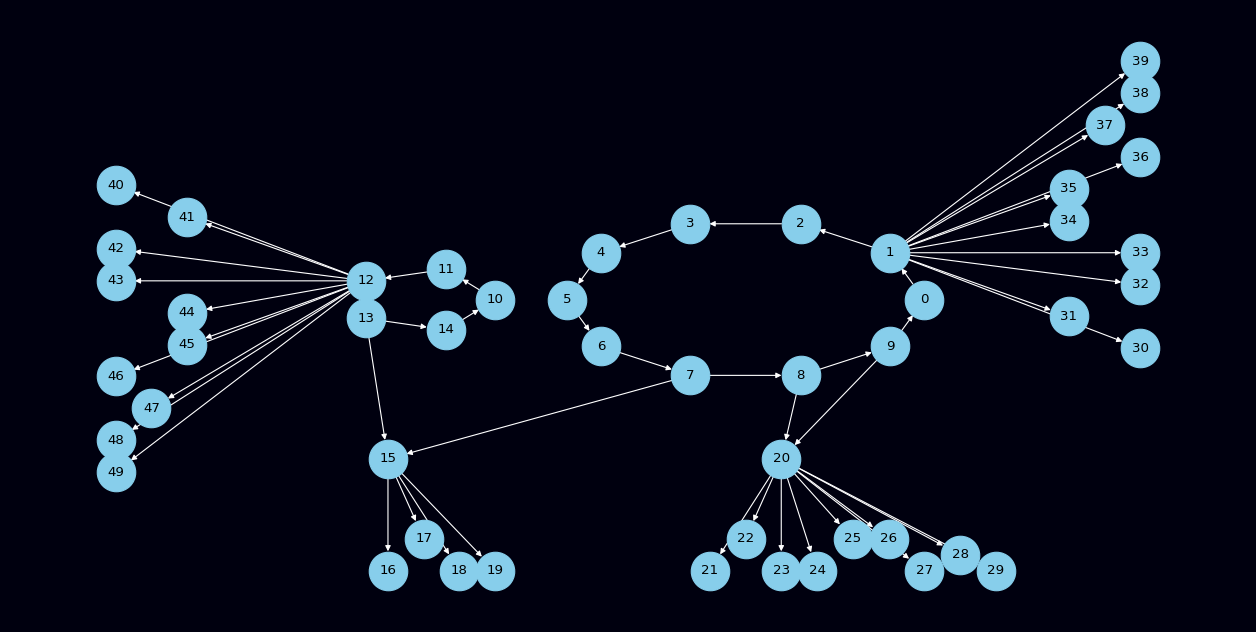

<Figure size 640x480 with 0 Axes>

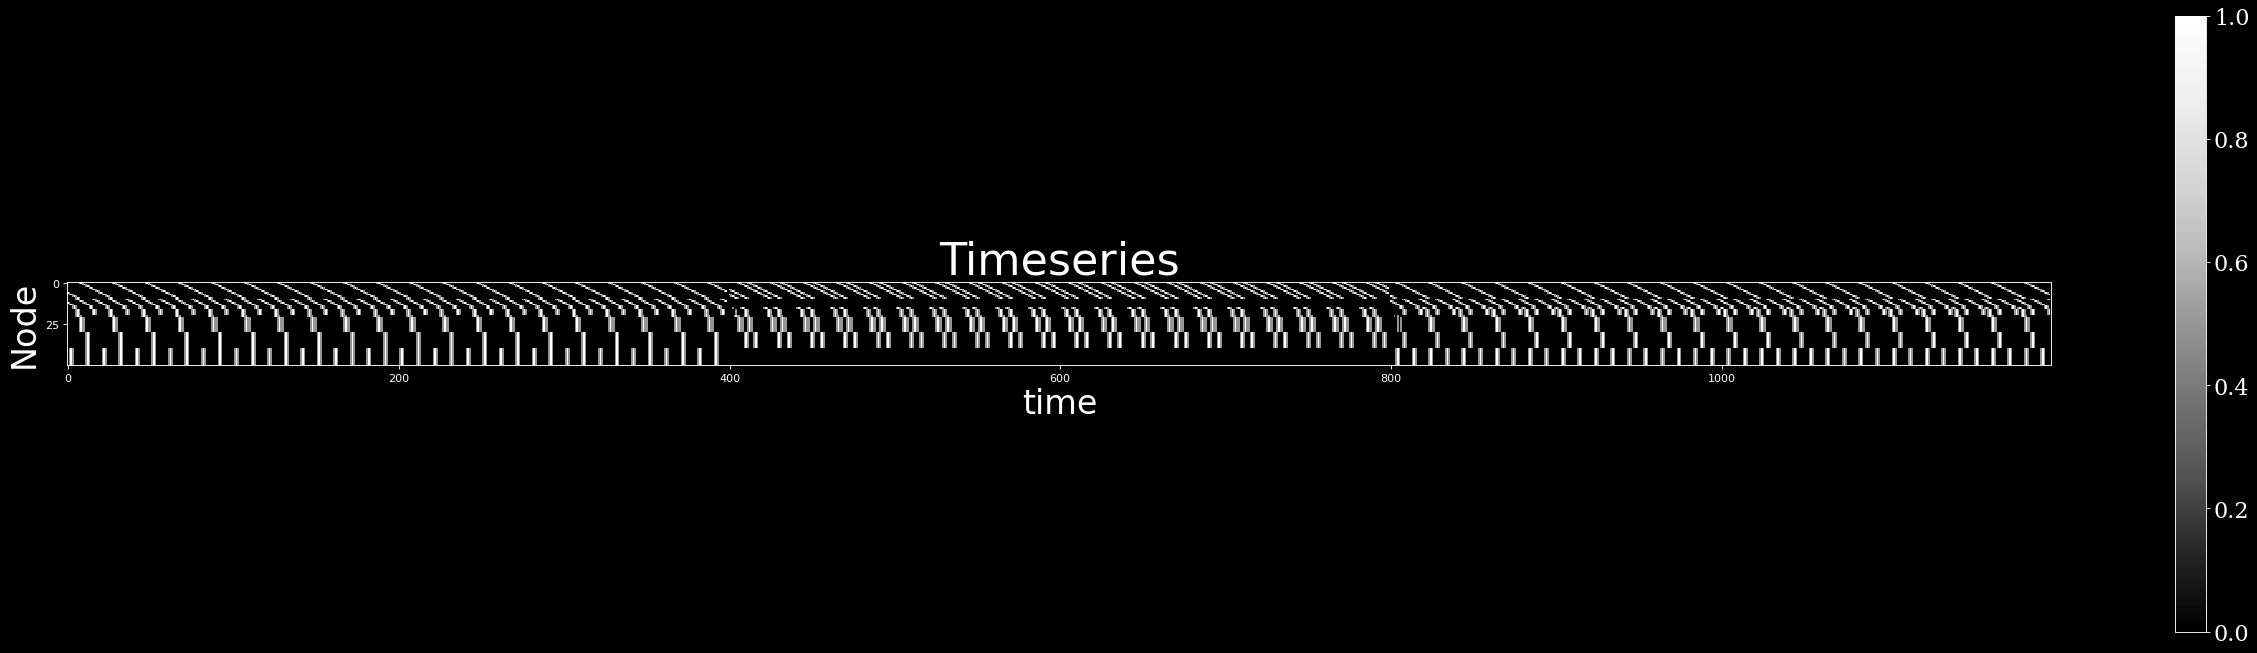

In [2]:
genData.genData()

In [3]:
cfg = OmegaConf.load("config.yaml")
cmd_cfg = OmegaConf.from_cli()
cfg = OmegaConf.merge(cfg, cmd_cfg)
print(OmegaConf.to_yaml(cfg))

seed: 42
optimize:
  optimizer: Adam
  lr: 0.001
train:
  epochs: 100
  batch_size: 32
dataset:
  path: MNIST
  test_size: 0.2
  train_size: 0.6
  val_size: 0.2
  num_workers: 2
loss: MSE
--ip: 127.0.0.1
--stdin: 9003
--control: 9001
--hb: 9000
--Session:
  signature_scheme: hmac-sha256
  key: b"30a4234a-fd95-485d-a486-c4d9b7355ef0"
--shell: 9002
--transport: tcp
--iopub: 9004
--f: c:\Users\aleja\AppData\Roaming\jupyter\runtime\kernel-v2-52800Si44gdjD5oQ.json



In [4]:
timeseries = np.random.rand(10, 1000)

train_loader, val_loader, test_loader = loader.generateLoaders(timeseries, 'pearson')

X_train shape:  (10, 600)
X_val shape:  (10, 200)
X_test shape:  (10, 200)


Using device: cuda
cuda
epoch: 10 	 training loss: 0.08624419122934342 	 validation loss: 0.08752868324518204 	 accuracy : 1.0
epoch: 20 	 training loss: 0.08366450816392898 	 validation loss: 0.08718651781479518 	 accuracy : 1.0
epoch: 30 	 training loss: 0.08056620582938194 	 validation loss: 0.0869855210185051 	 accuracy : 1.0
epoch: 40 	 training loss: 0.08147785812616348 	 validation loss: 0.08666577935218811 	 accuracy : 1.0
epoch: 50 	 training loss: 0.08112698569893836 	 validation loss: 0.08648025741179784 	 accuracy : 1.0
epoch: 60 	 training loss: 0.07888347506523133 	 validation loss: 0.08743397394816081 	 accuracy : 1.0
epoch: 70 	 training loss: 0.07616973966360092 	 validation loss: 0.08703903357187907 	 accuracy : 1.0
epoch: 80 	 training loss: 0.07535990960896015 	 validation loss: 0.08730700363715489 	 accuracy : 1.0
epoch: 90 	 training loss: 0.07711499258875847 	 validation loss: 0.08837748567263286 	 accuracy : 1.0
epoch: 100 	 training loss: 0.07575221434235573 	 

<Figure size 640x480 with 0 Axes>

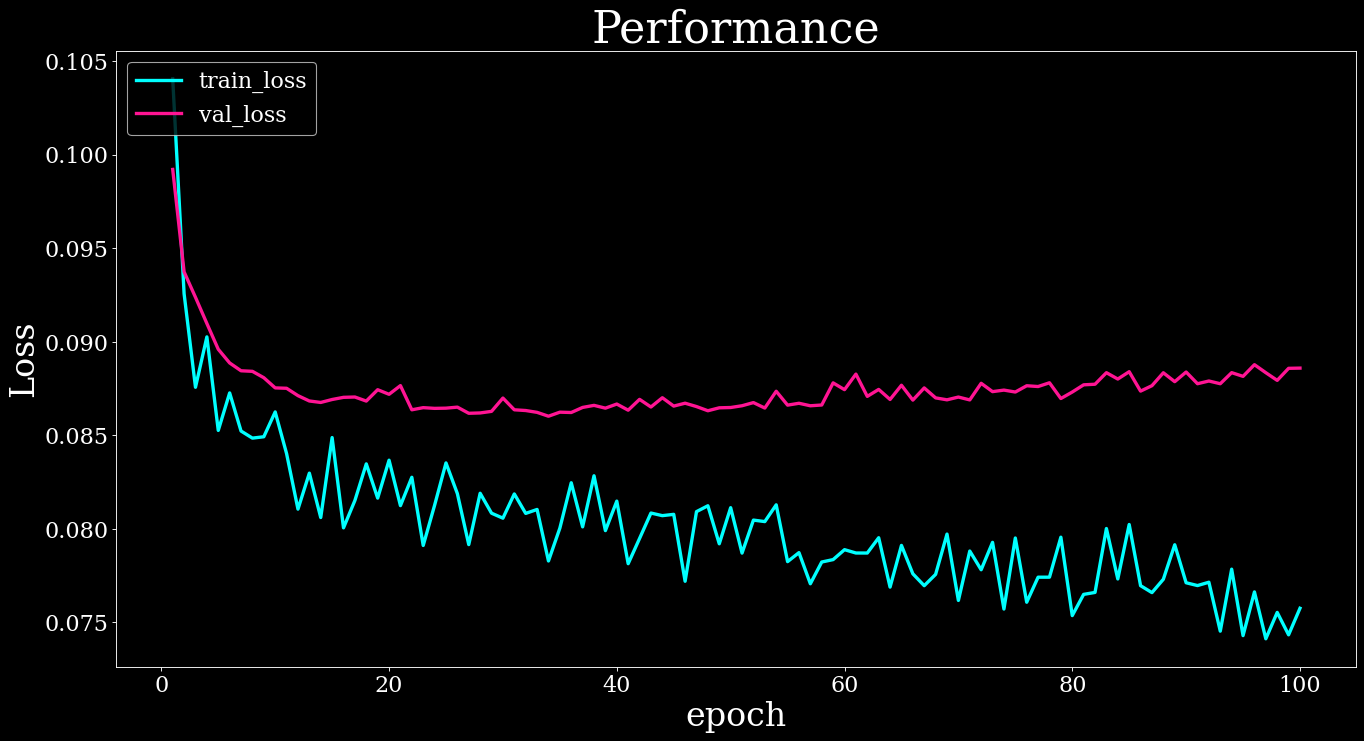

: 

In [5]:
window = 20
model = models.GNN(window, 1, 32)

model, train_losses, val_losses, accuracy_list  = train.train(model, train_loader, val_loader, 'GNNSimple')